<a href="https://colab.research.google.com/github/radhikakumar0705/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical


In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # Flatten the 28x28 input images
model.add(layers.Dense(units =128, activation='relu'))   # Dense hidden layer with ReLU activation
model.add(layers.Dropout(0.2))                    # Dropout layer to reduce overfitting
model.add(layers.Dense(units = 10, activation='softmax')) # Output layer with 10 units (for 10 digits)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(train_images, train_labels , epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3208 - accuracy: 0.9071 - val_loss: 0.1573 - val_accuracy: 0.9553
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1599 - accuracy: 0.9525 - val_loss: 0.1171 - val_accuracy: 0.9663
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1160 - accuracy: 0.9659 - val_loss: 0.1030 - val_accuracy: 0.9682
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0945 - accuracy: 0.9709 - val_loss: 0.0915 - val_accuracy: 0.9709
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0774 - accuracy: 0.9756 - val_loss: 0.0881 - val_accuracy: 0.9722


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Save the trained model for future use
model.save('mnist_model.h5')

313/313 [==============================] - 2s 5ms/step - loss: 0.0809 - accuracy: 0.9755
Test accuracy: 0.9754999876022339


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('mnist_model.h5')

# Load the MNIST dataset
(_, _), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Select a random index
random_index = np.random.randint(0, test_images.shape[0])

In [ ]:
# Get the image and label
image = test_images[random_index]
label = test_labels[random_index]

# Reshape the image to match the model's expected input shape
input_image = np.expand_dims(image, axis=0)

Text(0.5, 1.0, 'Original Image\nTrue Label:\xa02')

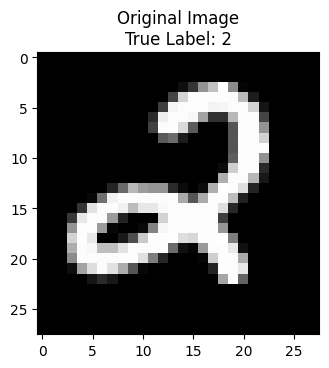

In [ ]:
input_image = input_image / 255.0
# Display the original and normalized images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title(f"Original Image\nTrue Label: {label}")

1/1 [==============================] - 0s 51ms/step


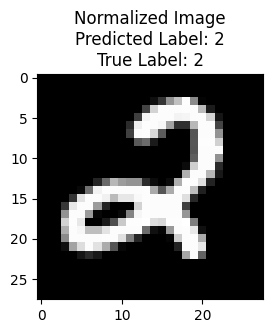

In [ ]:
predictions = model.predict(input_image)
predicted_label = np.argmax(predictions)
plt.subplot(1, 2, 2)
plt.imshow(input_image[0], cmap='gray')
plt.title(f"Normalized Image\nPredicted Label: {predicted_label}\nTrue Label: {label}")

plt.show()